In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import string
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [ ]:
dfraw=pd.read_csv('ghc_test.tsv',sep='\t')

In [ ]:
dfraw

,text,hd,cv,vo
0,https://www.youtube.com/watch?v=kACWpKAKtak A ...,0,0,0
1,Very nice! I tend to get tired of the constant...,0,0,0
2,Watch today. https://circumcisionmovie.com/,0,0,0
3,""" Thinking Venues "" First Color Layer blocking...",0,0,0
4,What about death penalty for perpetrators and...,0,0,0
...,...,...,...,...
5505,"Trump To ""Counter"" DNC Lawsuit; Seeks Servers,...",0,0,0
5506,i guess eu is gonna have to back track a littl...,0,0,0
5507,A good read here.... https://countrysquire....,0,0,0
5508,The only way to change things is to have compa...,0,0,0


In [ ]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510 entries, 0 to 5509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5510 non-null   object
 1   hd      5510 non-null   int64 
 2   cv      5510 non-null   int64 
 3   vo      5510 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 172.3+ KB


In [ ]:
dfraw['label']=dfraw['hd']+dfraw['cv']+dfraw['vo']

In [ ]:
dfraw.head()

,text,hd,cv,vo,label
0,https://www.youtube.com/watch?v=kACWpKAKtak A ...,0,0,0,0
1,Very nice! I tend to get tired of the constant...,0,0,0,0
2,Watch today. https://circumcisionmovie.com/,0,0,0,0
3,""" Thinking Venues "" First Color Layer blocking...",0,0,0,0
4,What about death penalty for perpetrators and...,0,0,0,0


In [ ]:
dfraw.isna().sum()

text     0
hd       0
cv       0
vo       0
label    0
dtype: int64

In [ ]:
dfraw['label'].unique()

array([0, 1, 2, 3])

In [ ]:
dfraw=dfraw.replace({'label':{3:2}})

In [ ]:
dfraw['label'].unique()

array([0, 1, 2])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
import re
dfraw['text'] = dfraw['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
dfraw

,text,hd,cv,vo,label
0,,0,0,0,0
1,Very nice! I tend to get tired of the constant...,0,0,0,0
2,Watch today.,0,0,0,0
3,""" Thinking Venues "" First Color Layer blocking...",0,0,0,0
4,What about death penalty for perpetrators and...,0,0,0,0
...,...,...,...,...,...
5505,"Trump To ""Counter"" DNC Lawsuit; Seeks Servers,...",0,0,0,0
5506,i guess eu is gonna have to back track a littl...,0,0,0,0
5507,A good read here....,0,0,0,0
5508,The only way to change things is to have compa...,0,0,0,0


In [ ]:
dfraw.isna().sum()

text     0
hd       0
cv       0
vo       0
label    0
dtype: int64

In [ ]:
dfraw1=dfraw.drop(labels=0, axis=0)
dfraw1

,text,hd,cv,vo,label
1,Very nice! I tend to get tired of the constant...,0,0,0,0
2,Watch today.,0,0,0,0
3,""" Thinking Venues "" First Color Layer blocking...",0,0,0,0
4,What about death penalty for perpetrators and...,0,0,0,0
5,You have insecurities? Fuck you,0,0,0,0
...,...,...,...,...,...
5505,"Trump To ""Counter"" DNC Lawsuit; Seeks Servers,...",0,0,0,0
5506,i guess eu is gonna have to back track a littl...,0,0,0,0
5507,A good read here....,0,0,0,0
5508,The only way to change things is to have compa...,0,0,0,0


In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Remove Accented Chars
def remove_accented_chars_func(text):
    '''
    Removes all accented characters from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without accented characters
    '''
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
# Remove punctuation
def remove_punctuation_func(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)
# Remove Irrelevant Char
def remove_irr_char_func(text):
    '''
    Removes all irrelevant characters (numbers and punctuation) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without irrelevant characters
    '''
    return re.sub(r'[^a-zA-Z]', ' ', text)
#Remove Whitespaces
def remove_extra_whitespaces_func(text):
    '''
    Removes extra whitespaces from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()
#lemmatization
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    text=remove_accented_chars_func(text)
    text=remove_punctuation_func(text)
    text=remove_irr_char_func(text)
    text=remove_extra_whitespaces_func(text)
    return text
#Apply function on review column
dfraw1['text']=dfraw1['text'].apply(denoise_text)

dfraw1

,text,hd,cv,vo,label
1,nice tend get tired constant stream ridiculous...,0,0,0,0
2,Watch today,0,0,0,0
3,Thinking Venues First Color Layer blocking Fig...,0,0,0,0
4,death penalty perpetrators expelling remaining...,0,0,0,0
5,insecurities Fuck,0,0,0,0
...,...,...,...,...,...
5505,Trump Counter DNC Lawsuit Seeks Servers Clinto...,0,0,0,0
5506,guess eu gonna back track little usa says matt...,0,0,0,0
5507,good read here,0,0,0,0
5508,way change things compassion rational possible...,0,0,0,0


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)
dfraw1['text'] = dfraw1['text'].apply(lemmatize_words)

dfraw1

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,hd,cv,vo,label
1,nice tend get tire constant stream ridiculousl...,0,0,0,0
2,Watch today,0,0,0,0
3,Thinking Venues First Color Layer block Figure...,0,0,0,0
4,death penalty perpetrators expel remain rest f...,0,0,0,0
5,insecurities Fuck,0,0,0,0
...,...,...,...,...,...
5505,Trump Counter DNC Lawsuit Seeks Servers Clinto...,0,0,0,0
5506,guess eu gonna back track little usa say matte...,0,0,0,0
5507,good read here,0,0,0,0
5508,way change things compassion rational possible...,0,0,0,0


In [ ]:
dfclean01=dfraw1[['text', 'label']]
dfclean01

,text,label
1,nice tend get tire constant stream ridiculousl...,0
2,Watch today,0
3,Thinking Venues First Color Layer block Figure...,0
4,death penalty perpetrators expel remain rest f...,0
5,insecurities Fuck,0
...,...,...
5505,Trump Counter DNC Lawsuit Seeks Servers Clinto...,0
5506,guess eu gonna back track little usa say matte...,0
5507,good read here,0
5508,way change things compassion rational possible...,0


In [ ]:
dfclean01['Corpus Name']='The GabHate corpus'
dfclean01

<ipython-input-24-471f46c06f50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean01['Corpus Name']='The GabHate corpus'


,text,label,Corpus Name
1,nice tend get tire constant stream ridiculousl...,0,The GabHate corpus
2,Watch today,0,The GabHate corpus
3,Thinking Venues First Color Layer block Figure...,0,The GabHate corpus
4,death penalty perpetrators expel remain rest f...,0,The GabHate corpus
5,insecurities Fuck,0,The GabHate corpus
...,...,...,...
5505,Trump Counter DNC Lawsuit Seeks Servers Clinto...,0,The GabHate corpus
5506,guess eu gonna back track little usa say matte...,0,The GabHate corpus
5507,good read here,0,The GabHate corpus
5508,way change things compassion rational possible...,0,The GabHate corpus


In [ ]:
dfclean01['raw_sentence']=dfraw['text']
dfclean01

<ipython-input-25-a9e5f15552cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean01['raw_sentence']=dfraw['text']


,text,label,Corpus Name,raw_sentence
1,nice tend get tire constant stream ridiculousl...,0,The GabHate corpus,Very nice! I tend to get tired of the constant...
2,Watch today,0,The GabHate corpus,Watch today.
3,Thinking Venues First Color Layer block Figure...,0,The GabHate corpus,""" Thinking Venues "" First Color Layer blocking..."
4,death penalty perpetrators expel remain rest f...,0,The GabHate corpus,What about death penalty for perpetrators and...
5,insecurities Fuck,0,The GabHate corpus,You have insecurities? Fuck you
...,...,...,...,...
5505,Trump Counter DNC Lawsuit Seeks Servers Clinto...,0,The GabHate corpus,"Trump To ""Counter"" DNC Lawsuit; Seeks Servers,..."
5506,guess eu gonna back track little usa say matte...,0,The GabHate corpus,i guess eu is gonna have to back track a littl...
5507,good read here,0,The GabHate corpus,A good read here....
5508,way change things compassion rational possible...,0,The GabHate corpus,The only way to change things is to have compa...


In [ ]:
dfclean02=dfclean01[['Corpus Name','raw_sentence','label']]
dfclean02

,Corpus Name,raw_sentence,label
1,The GabHate corpus,Very nice! I tend to get tired of the constant...,0
2,The GabHate corpus,Watch today.,0
3,The GabHate corpus,""" Thinking Venues "" First Color Layer blocking...",0
4,The GabHate corpus,What about death penalty for perpetrators and...,0
5,The GabHate corpus,You have insecurities? Fuck you,0
...,...,...,...
5505,The GabHate corpus,"Trump To ""Counter"" DNC Lawsuit; Seeks Servers,...",0
5506,The GabHate corpus,i guess eu is gonna have to back track a littl...,0
5507,The GabHate corpus,A good read here....,0
5508,The GabHate corpus,The only way to change things is to have compa...,0


In [ ]:
dfclean02['clean_sentence_training']=dfclean01['text']
dfclean02

,Corpus Name,raw_sentence,label,clean_sentence_training
1,The GabHate corpus,Very nice! I tend to get tired of the constant...,0,nice tend get tire constant stream ridiculousl...
2,The GabHate corpus,Watch today.,0,Watch today
3,The GabHate corpus,""" Thinking Venues "" First Color Layer blocking...",0,Thinking Venues First Color Layer block Figure...
4,The GabHate corpus,What about death penalty for perpetrators and...,0,death penalty perpetrators expel remain rest f...
5,The GabHate corpus,You have insecurities? Fuck you,0,insecurities Fuck
...,...,...,...,...
5505,The GabHate corpus,"Trump To ""Counter"" DNC Lawsuit; Seeks Servers,...",0,Trump Counter DNC Lawsuit Seeks Servers Clinto...
5506,The GabHate corpus,i guess eu is gonna have to back track a littl...,0,guess eu gonna back track little usa say matte...
5507,The GabHate corpus,A good read here....,0,good read here
5508,The GabHate corpus,The only way to change things is to have compa...,0,way change things compassion rational possible...


In [ ]:
dfclean02['clean_sentence_EDA']=dfclean01['text']
dfclean02

,Corpus Name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
1,The GabHate corpus,Very nice! I tend to get tired of the constant...,0,nice tend get tire constant stream ridiculousl...,nice tend get tire constant stream ridiculousl...
2,The GabHate corpus,Watch today.,0,Watch today,Watch today
3,The GabHate corpus,""" Thinking Venues "" First Color Layer blocking...",0,Thinking Venues First Color Layer block Figure...,Thinking Venues First Color Layer block Figure...
4,The GabHate corpus,What about death penalty for perpetrators and...,0,death penalty perpetrators expel remain rest f...,death penalty perpetrators expel remain rest f...
5,The GabHate corpus,You have insecurities? Fuck you,0,insecurities Fuck,insecurities Fuck
...,...,...,...,...,...
5505,The GabHate corpus,"Trump To ""Counter"" DNC Lawsuit; Seeks Servers,...",0,Trump Counter DNC Lawsuit Seeks Servers Clinto...,Trump Counter DNC Lawsuit Seeks Servers Clinto...
5506,The GabHate corpus,i guess eu is gonna have to back track a littl...,0,guess eu gonna back track little usa say matte...,guess eu gonna back track little usa say matte...
5507,The GabHate corpus,A good read here....,0,good read here,good read here
5508,The GabHate corpus,The only way to change things is to have compa...,0,way change things compassion rational possible...,way change things compassion rational possible...


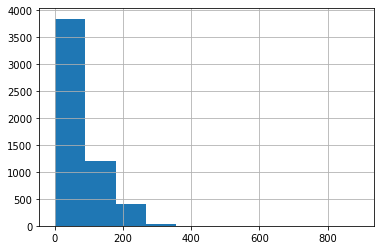

In [ ]:
data = dfclean02['clean_sentence_EDA']
data.str.len().hist()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk.data
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

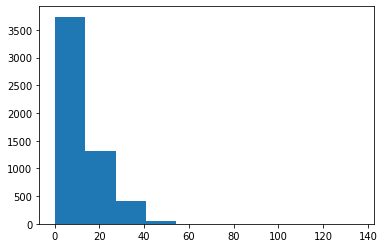

In [ ]:
counts = []

for sentence in dfclean02['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    word_count = len(sentence)
    counts.append(word_count)

plt.hist(counts)
plt.show()

In [ ]:
total_num_words = sum(counts) # total number of words
average_sentence_length = np.mean(counts) # print everage sentence length

word_lengths = []
for sentence in dfclean02['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        length = len(word)
        word_lengths.append(length)

average_word_length = np.mean(word_lengths) # print everage word length

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of words in the dataset: {average_word_length} characters.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')

Total number of words in the dataset: 65796 words.
Average length of words in the dataset: 5.398565262325977 characters.
Average length of sentences in the dataset: 11.943365402069341 words.


In [ ]:
dfhate = dfclean02[(dfclean02['label'] !=0)]
dfhate

,Corpus Name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
11,The GabHate corpus,Mental illness is a family illness. At least ...,1,Mental illness family illness least gene pool now,Mental illness family illness least gene pool now
13,The GabHate corpus,"IQ cannot be altered stupid, a nigger with an ...",1,IQ cannot alter stupid nigger IQ die low IQ ni...,IQ cannot alter stupid nigger IQ die low IQ ni...
22,The GabHate corpus,Spoken like a fucking dum shit You are a gutl...,2,Spoken like fuck dum shit gutless pussy boy wo...,Spoken like fuck dum shit gutless pussy boy wo...
25,The GabHate corpus,"My latest piece: GWOT Veterans, If You Suffer...",1,latest piece GWOT Veterans Suffer PTSD Malinge...,latest piece GWOT Veterans Suffer PTSD Malinge...
26,The GabHate corpus,"Luckily for protesting Brits, the Presidents s...",1,Luckily protest Brits Presidents security deta...,Luckily protest Brits Presidents security deta...
...,...,...,...,...,...
5454,The GabHate corpus,PUTIN DROPS HELSINKI BOMB > HILLARY CLINTON G...,1,PUTIN DROPS HELSINKI BOMB HILLARY CLINTON GOT ...,PUTIN DROPS HELSINKI BOMB HILLARY CLINTON GOT ...
5477,The GabHate corpus,There is no such thing as a 'sex worker'. You ...,2,thing sex worker whore prostitute Preeeeeety m...,thing sex worker whore prostitute Preeeeeety m...
5483,The GabHate corpus,Ok whatever you say nigger.,2,Ok whatever say nigger,Ok whatever say nigger
5488,The GabHate corpus,"There are alway a few magic negro's, but you d...",1,alway magic negro s dont make rule exception s,alway magic negro s dont make rule exception s


In [ ]:
all_words = []

for sentence in dfhate['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        all_words.append(word)

print(all_words[:100])

['Mental', 'illness', 'family', 'illness', 'least', 'gene', 'pool', 'now', 'IQ', 'can', 'not', 'alter', 'stupid', 'nigger', 'IQ', 'die', 'low', 'IQ', 'nigger', 'IQ', 'mildly', 'retard', 'Canadian', 'standards', 'Maybe', 'drink', 'camel', 'piss', 'eat', 'human', 'heart', 'Spoken', 'like', 'fuck', 'dum', 'shit', 'gutless', 'pussy', 'boy', 'would', 'give', 'children', 'place', 'dollars', 'dum', 'shit', 'like', 'what', 's', 'wrong', 'white', 'race', 'Anny', 'man', 'say', 'shit', 'like', 'deserve', 'traitors', 'death', 'way', 'fuck', 'latest', 'piece', 'GWOT', 'Veterans', 'Suffer', 'PTSD', 'Malingerers', 'Luckily', 'protest', 'Brits', 'Presidents', 'security', 'detail', 'tell', 'dont', 'shoot', 'see', 'brown', 'teeth', 'Absolutely', 'agree', 'everything', 'except', 'perhaps', 'compensate', 'them', 'Muslims', 'raise', 'strong', 'hatred', 'non', 'Muslims', 'seek', 'subjugate', 'force', 'live', 'persecute', 'second']


In [ ]:
from collections import Counter

In [ ]:
most_common = Counter(all_words).most_common(20)
print(most_common)

[('s', 81), ('get', 81), ('like', 78), ('people', 72), ('fuck', 69), ('white', 66), ('shit', 56), ('go', 55), ('would', 53), ('know', 47), ('see', 46), ('say', 45), ('think', 43), ('Jews', 41), ('I', 39), ('need', 39), ('right', 37), ('it', 37), ('make', 36), ('want', 34)]


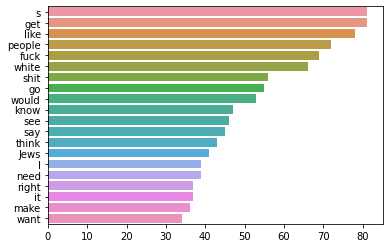

In [ ]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [ ]:
all_words_clean = []

for sentence in dfhate['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        word = word.lower() # lowercase all word
        if len(word) >= 3: # quick solution to get rif of contractions
            # find better solution in official version
            all_words_clean.append(word)

print(all_words_clean[:100])

['mental', 'illness', 'family', 'illness', 'least', 'gene', 'pool', 'now', 'can', 'not', 'alter', 'stupid', 'nigger', 'die', 'low', 'nigger', 'mildly', 'retard', 'canadian', 'standards', 'maybe', 'drink', 'camel', 'piss', 'eat', 'human', 'heart', 'spoken', 'like', 'fuck', 'dum', 'shit', 'gutless', 'pussy', 'boy', 'would', 'give', 'children', 'place', 'dollars', 'dum', 'shit', 'like', 'what', 'wrong', 'white', 'race', 'anny', 'man', 'say', 'shit', 'like', 'deserve', 'traitors', 'death', 'way', 'fuck', 'latest', 'piece', 'gwot', 'veterans', 'suffer', 'ptsd', 'malingerers', 'luckily', 'protest', 'brits', 'presidents', 'security', 'detail', 'tell', 'dont', 'shoot', 'see', 'brown', 'teeth', 'absolutely', 'agree', 'everything', 'except', 'perhaps', 'compensate', 'them', 'muslims', 'raise', 'strong', 'hatred', 'non', 'muslims', 'seek', 'subjugate', 'force', 'live', 'persecute', 'second', 'class', 'citizens', 'people', 'poisonous', 'deserve']


In [ ]:
most_common2 = Counter(all_words_clean).most_common(20)
print(most_common2)

[('fuck', 91), ('white', 91), ('get', 85), ('like', 83), ('people', 79), ('jews', 67), ('shit', 59), ('would', 56), ('see', 52), ('know', 47), ('say', 46), ('think', 44), ('right', 41), ('need', 41), ('make', 39), ('trump', 38), ('can', 36), ('want', 36), ('black', 35), ('jew', 35)]


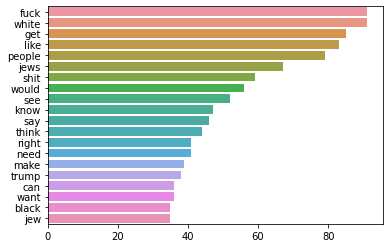

In [ ]:
words, frequency = [], []
for word, count in most_common2:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [ ]:
risky = 0
potentially_risky = 0
non_risky = 0
void = 0
other = 0

for label in str(dfclean02['label']):
    if label == '1':
        potentially_risky += 1
    elif label == '2':
        risky += 1
    elif label == '0':
        non_risky += 1
    elif label == "":
        void += 1
    else:
        other += 1

print(risky)
print(potentially_risky)
print(non_risky)
print(other)
print(void)

1
1
16
131
0


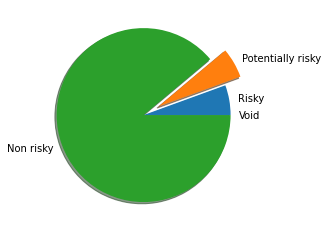

In [ ]:
# plot a pie chart to show label proportions

y = np.array([risky, potentially_risky, non_risky, void])
custom_labels = ["Risky", "Potentially risky", "Non risky", "Void"]
myexplode = [0, 0.2, 0, 0] # not compulsory (use for interesting value, i.e, most or least represented)

plt.pie(y, labels = custom_labels, explode = myexplode, shadow = True)
plt.show() 

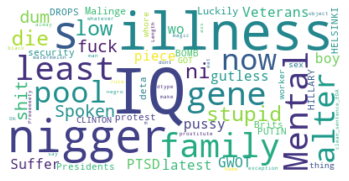

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(dfhate['clean_sentence_EDA']))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()